In [375]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_validate


from sklearn.metrics import mean_squared_error

from tqdm import tqdm

In [371]:
from warnings import filterwarnings

In [372]:
filterwarnings('ignore')

In [2]:
train = pd.read_csv('data_assignment.csv')
test = pd.read_csv('test_BigMartSales.csv')

In [3]:
sample = pd.read_csv('sample_submission_8RXa3c6.csv')

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [6]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [7]:
train['Item_Outlet_Sales'].mean()

2181.2889135750365

In [8]:
sample['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].mean()

In [9]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


In [10]:
sample.to_csv('test_benchmark.csv', index = False)

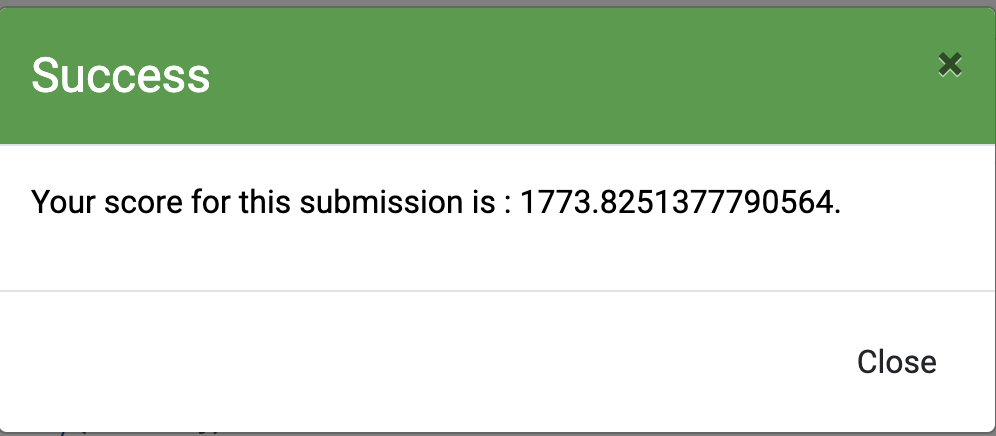

In [11]:
result = test[['Item_Identifier', 'Outlet_Identifier']]

In [12]:
result['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].mean()

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_9916/1001671821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].mean()


In [13]:
result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


# Modelling with one column

In [14]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
columns = 'Item_MRP'

In [16]:
model = LinearRegression()

In [17]:
model.fit(train[['Item_MRP']], train['Item_Outlet_Sales'])

LinearRegression()

In [18]:
res_mrp_simple = model.predict(test[['Item_MRP']])

In [19]:
res_mrp_simple

array([1666.00819233, 1346.51176166, 3748.4273983 , ..., 1835.25308384,
       3326.44276374, 1229.49392319])

In [20]:
result['Item_Outlet_Sales']  = res_mrp_simple

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_9916/490023130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Item_Outlet_Sales']  = res_mrp_simple


In [21]:
result.to_csv('result_item_mrp.csv', index = False)

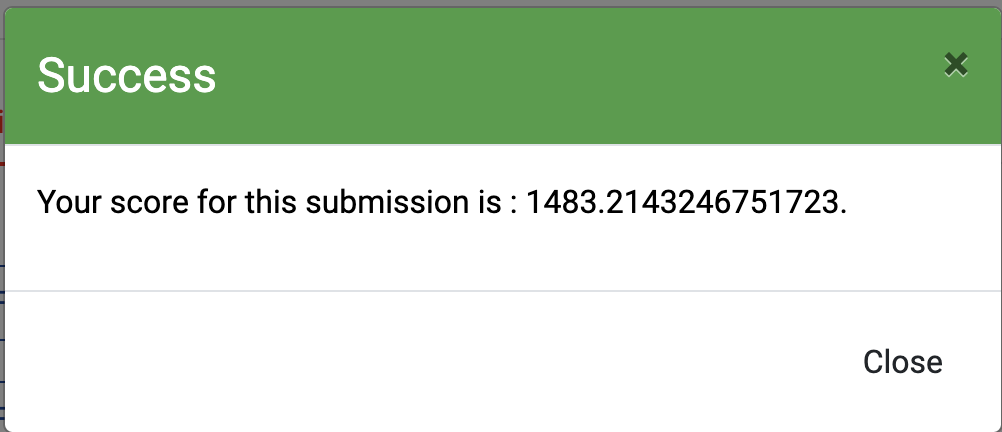

In [22]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [23]:
# Combine the train + test
# Perform the preprocessing
# separate the preprocessed train. data
# Model on the preprocessed train data
# predict on the preprocessed test data

In [24]:
# Combine the train and test data

In [25]:
train['source'] = 'train'
test['source'] = 'test'

In [26]:
data = pd.concat([train, test])

In [27]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


# Feature Extraction

### Creating a new feature out of an excisting feature

In [28]:
data['Item_Identifier_code'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [29]:
data[['Item_Identifier','Item_Identifier_code']]

,Item_Identifier,Item_Identifier_code
0,FDA15,FD
1,DRC01,DR
2,FDN15,FD
3,FDX07,FD
4,NCD19,NC
...,...,...
5676,FDB58,FD
5677,FDD47,FD
5678,NCO17,NC
5679,FDJ26,FD


In [30]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [31]:
data['Item_Identifier'].nunique()

1559

In [32]:
data['Item_Identifier_code'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [33]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [34]:
del data['Outlet_Establishment_Year']

# Missing Value treatement

In [35]:
data.isna().sum()

Item_Identifier            0
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

In [36]:
data['Item_Weight'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean()))
                                                                                               

In [37]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

In [38]:
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [39]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

# Data Correction

In [40]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [41]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)


In [42]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:ylabel='Frequency'>

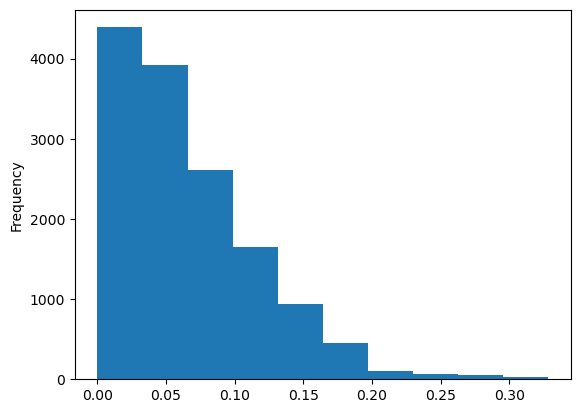

In [43]:
data['Item_Visibility'].plot(kind = 'hist' )

In [44]:
data['Item_Visibility'].value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [45]:
data.loc[data['Item_Visibility']==0.000000,'Item_Visibility' ] = np.NaN

In [46]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility          879
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

In [47]:
data['Item_Visibility'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Visibility.transform(lambda x: x.fillna(x.mean()))


In [48]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Item_Identifier_code       0
Outlet_Age                 0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

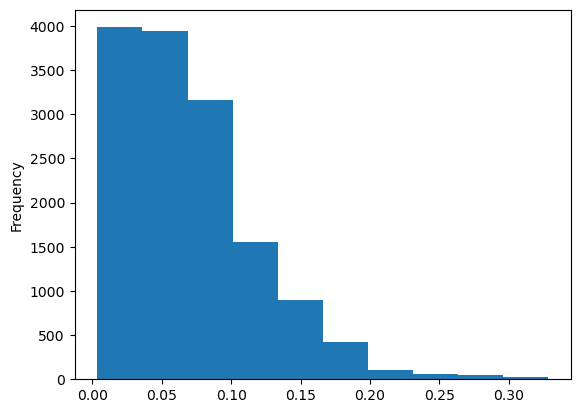

In [49]:
data['Item_Visibility'].plot(kind = 'hist' )

# Encoding of Features

In [50]:
cat_columns = data.select_dtypes(exclude = np.number).drop(columns=['Item_Identifier', 'source'])


In [51]:
encoded_cat = pd.get_dummies(cat_columns)

In [52]:
numerical_data = data.select_dtypes(include = np.number)

In [53]:
encoded_cat = encoded_cat.reset_index().drop(columns='index')
numerical_data = numerical_data.reset_index().drop(columns='index')

In [54]:
item_ident_source = data[['Item_Identifier','Outlet_Identifier', 'source']].reset_index().drop(columns='index')

In [55]:
data_preprocessed = pd.concat([numerical_data,encoded_cat,item_ident_source], axis =1)

In [56]:
train_preprocessed = data_preprocessed[data_preprocessed['source']=='train']

In [57]:
train_preprocessed.drop(columns='source', inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_9916/1295772899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprocessed.drop(columns='source', inplace = True)


In [58]:
train_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_code_DR,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Identifier,Outlet_Identifier
0,9.300,0.016047,249.8092,3735.1380,24,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDA15,OUT049
1,5.920,0.019278,48.2692,443.4228,14,0,1,0,0,0,...,1,0,0,1,0,1,0,0,DRC01,OUT018
2,17.500,0.016760,141.6180,2097.2700,24,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDN15,OUT049
3,19.200,0.073305,182.0950,732.3800,25,0,1,0,0,0,...,1,1,0,0,0,0,1,0,FDX07,OUT010
4,8.930,0.063186,53.8614,994.7052,36,1,0,0,0,0,...,1,0,1,0,0,0,0,1,NCD19,OUT013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,36,1,0,0,0,0,...,1,0,1,0,0,0,1,0,FDF22,OUT013
8519,8.380,0.046982,108.1570,549.2850,21,0,1,1,0,0,...,0,0,1,0,0,0,1,0,FDS36,OUT045
8520,10.600,0.035186,85.1224,1193.1136,19,1,0,0,0,0,...,0,0,1,0,0,0,0,1,NCJ29,OUT035
8521,7.210,0.145221,103.1332,1845.5976,14,0,1,0,0,0,...,1,0,0,1,0,0,1,0,FDN46,OUT018


In [59]:
test_preprocessed = data_preprocessed[data_preprocessed['source']=='test']

In [60]:
test_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_code_DR,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Identifier,Outlet_Identifier,source
8523,20.75000,0.007565,107.8622,NaN,24,1,0,0,0,0,...,0,1,0,0,0,1,0,FDW58,OUT049,test
8524,8.30000,0.038428,87.3198,NaN,16,0,1,0,0,0,...,0,1,0,0,0,1,0,FDW14,OUT017,test
8525,14.60000,0.099575,241.7538,NaN,25,1,0,0,0,0,...,1,0,0,0,0,0,1,NCN55,OUT010,test
8526,7.31500,0.015388,155.0340,NaN,16,1,0,0,0,0,...,0,1,0,0,0,1,0,FDQ58,OUT017,test
8527,13.04178,0.118599,234.2300,NaN,38,0,1,0,0,0,...,0,0,0,1,0,1,0,FDY38,OUT027,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50000,0.013496,141.3154,NaN,26,0,1,0,0,0,...,0,1,0,0,0,1,0,FDB58,OUT046,test
14200,7.60000,0.142991,169.1448,NaN,14,0,1,0,0,0,...,0,0,1,0,0,1,0,FDD47,OUT018,test
14201,10.00000,0.073529,118.7440,NaN,21,1,0,0,0,0,...,0,1,0,0,0,0,1,NCO17,OUT045,test
14202,15.30000,0.071811,214.6218,NaN,16,0,1,0,0,0,...,0,1,0,0,0,1,0,FDJ26,OUT017,test


In [61]:
test_preprocessed.drop(columns=['source', 'Item_Outlet_Sales'], inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_9916/3175965521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprocessed.drop(columns=['source', 'Item_Outlet_Sales'], inplace = True)


In [62]:
test_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_code_DR,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Identifier,Outlet_Identifier
8523,20.75000,0.007565,107.8622,24,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,FDW58,OUT049
8524,8.30000,0.038428,87.3198,16,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDW14,OUT017
8525,14.60000,0.099575,241.7538,25,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,NCN55,OUT010
8526,7.31500,0.015388,155.0340,16,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,FDQ58,OUT017
8527,13.04178,0.118599,234.2300,38,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,FDY38,OUT027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50000,0.013496,141.3154,26,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,FDB58,OUT046
14200,7.60000,0.142991,169.1448,14,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,FDD47,OUT018
14201,10.00000,0.073529,118.7440,21,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,NCO17,OUT045
14202,15.30000,0.071811,214.6218,16,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,FDJ26,OUT017


In [63]:
train_preprocessed.to_csv('train_preprocessed.csv', index = False)
test_preprocessed.to_csv('test_preprocessed.csv', index = False)


# Modelling

In [64]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'])


In [65]:
y = train_preprocessed['Item_Outlet_Sales']

In [66]:
model = LinearRegression()

In [67]:
model.fit(X,y)

LinearRegression()

In [68]:
train_predict = model.predict(X)

In [69]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [70]:
test_predict = model.predict(test_X)

In [71]:
test_predict

array([1832.65244261, 1520.18863505, 1883.4402858 , ..., 1826.67394551,
       3568.66985479, 1289.88572258])

In [72]:
sample['Item_Outlet_Sales'] = test_predict

In [73]:
sample['Item_Outlet_Sales']

0       1832.652443
1       1520.188635
2       1883.440286
3       2577.216938
4       5133.704490
           ...     
5676    2300.979175
5677    2462.092472
5678    1826.673946
5679    3568.669855
5680    1289.885723
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [74]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Frequency'>

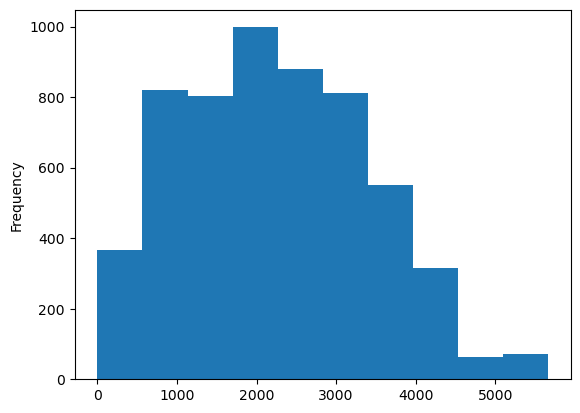

In [75]:
sample['Item_Outlet_Sales'].plot(kind = 'hist')

In [76]:
sample.to_csv('LR_All_Columns.csv', index = False)

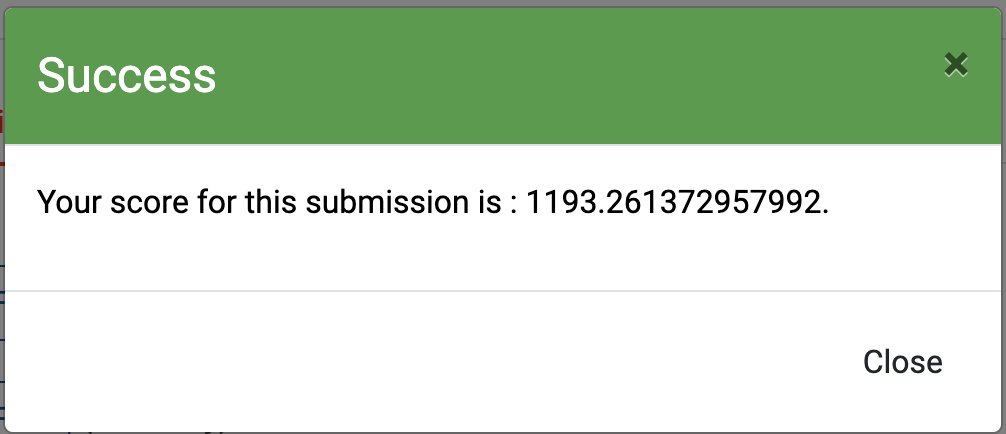

In [77]:
train_predict

array([4005.37758018,  559.425737  , 2368.29724095, ..., 1525.11554453,
       1400.64416964, 1210.05855095])

In [78]:
np.sqrt(mean_squared_error(y,train_predict ))

1127.0842767280371

In [79]:
model.coef_

array([-3.27900565e-01, -2.21305425e+02,  1.55702494e+01,  1.57633729e+01,
       -2.10113356e+01,  2.10113356e+01, -2.67204607e+00,  2.73888506e+00,
        2.76337640e+00,  2.25100966e+01, -5.35304871e+01, -3.07288874e+01,
        2.70005571e+01, -4.85954774e+01,  4.68766372e+00, -2.46375515e+01,
       -3.20033819e+00, -6.64981439e+00,  1.81727733e+02, -1.42281926e+01,
       -7.62229795e+01,  1.90374620e+01, -4.41347871e+02, -1.03057352e+02,
        1.69617864e+02, -8.14768894e+01, -4.46332189e+02,  5.92949409e+02,
        1.61845734e+02, -8.33306902e+01,  3.71284503e+02, -1.40152518e+02,
       -1.03057352e+02,  3.71320002e+02, -2.68262649e+02, -2.15200204e+02,
        2.48132908e+02, -3.29327040e+01, -8.87680060e+02,  3.76207540e+02,
       -8.14768894e+01,  5.92949409e+02,  3.66637414e+01, -1.00640392e+01,
       -2.65997022e+01])

<AxesSubplot:>

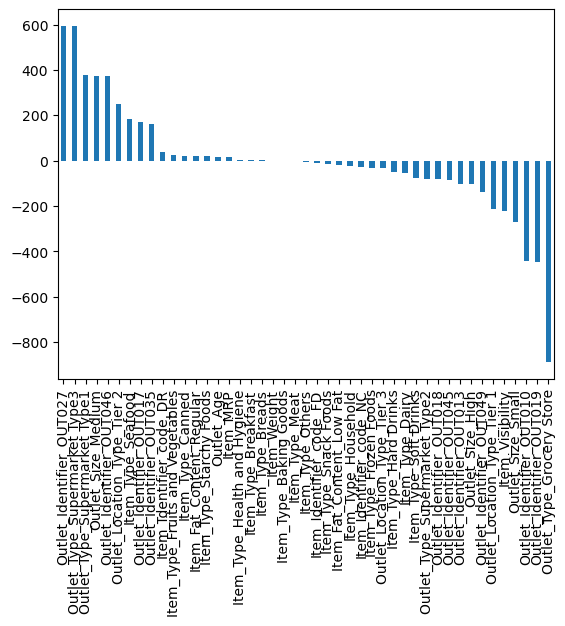

In [80]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [81]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False)

Outlet_Identifier_OUT027           592.949409
Outlet_Type_Supermarket Type3      592.949409
Outlet_Type_Supermarket Type1      376.207540
Outlet_Size_Medium                 371.320002
Outlet_Identifier_OUT046           371.284503
Outlet_Location_Type_Tier 2        248.132908
Item_Type_Seafood                  181.727733
Outlet_Identifier_OUT017           169.617864
Outlet_Identifier_OUT035           161.845734
Item_Identifier_code_DR             36.663741
Item_Type_Fruits and Vegetables     27.000557
Item_Type_Canned                    22.510097
Item_Fat_Content_Regular            21.011336
Item_Type_Starchy Foods             19.037462
Outlet_Age                          15.763373
Item_MRP                            15.570249
Item_Type_Health and Hygiene         4.687664
Item_Type_Breakfast                  2.763376
Item_Type_Breads                     2.738885
Item_Weight                         -0.327901
Item_Type_Baking Goods              -2.672046
Item_Type_Meat                    

In [82]:
model.intercept_

-563.5030355389299

# Regularaiztion

# Ridge L2

In [278]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'])


In [279]:
y = train_preprocessed['Item_Outlet_Sales']

In [280]:
model = Ridge(alpha = 100)

In [281]:
model.fit(X,y)

Ridge(alpha=100)

In [282]:
train_predict = model.predict(X)

In [283]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [284]:
test_predict = model.predict(test_X)

In [285]:
test_predict

array([1839.12677526, 1510.08436819, 1958.20855901, ..., 1836.0343095 ,
       3548.74589515, 1300.77670274])

In [286]:
sample['Item_Outlet_Sales'] = test_predict

In [287]:
sample['Item_Outlet_Sales']

0       1839.126775
1       1510.084368
2       1958.208559
3       2553.936929
4       5093.173377
           ...     
5676    2257.099102
5677    2474.365315
5678    1836.034310
5679    3548.745895
5680    1300.776703
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [288]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Frequency'>

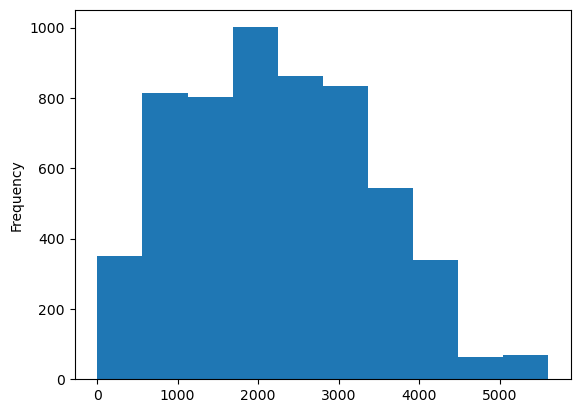

In [289]:
sample['Item_Outlet_Sales'].plot(kind = 'hist')

In [290]:
sample.to_csv('Ridge_All_Columns.csv', index = False)

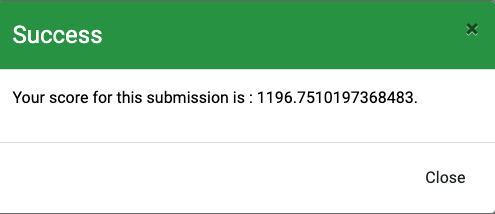

In [291]:
train_predict

array([4023.90989349,  565.83447055, 2375.48757339, ..., 1504.61237943,
       1421.90263838, 1177.7638147 ])

In [292]:
np.sqrt(mean_squared_error(y,train_predict ))

1127.794581499729

In [293]:
model.coef_

array([-3.19756723e-01, -6.62468350e+01,  1.55668303e+01,  1.55298353e+01,
       -2.00325780e+01,  2.00325780e+01, -2.45742038e+00,  2.29481531e+00,
       -2.11256330e+00,  2.09763216e+01, -4.04464236e+01, -2.59444427e+01,
        2.49714197e+01, -3.86324895e+00,  8.08641764e+00, -1.87398661e+01,
       -2.00547121e+00, -3.71260361e+00,  6.93831003e+01, -1.24654059e+01,
       -2.63475170e+01,  1.23828882e+01, -4.21929474e+02, -9.49439946e+01,
        1.58571052e+02, -7.94772988e+01, -4.24809267e+02,  5.63460323e+02,
        1.52759838e+02, -6.79114426e+01,  3.34766376e+02, -1.20486112e+02,
       -9.49439946e+01,  3.63496912e+02, -2.68552917e+02, -2.10529003e+02,
        2.43419448e+02, -3.28904443e+01, -8.46738741e+02,  3.62755717e+02,
       -7.94772988e+01,  5.63460323e+02,  8.74139917e+00,  5.62465285e+00,
       -1.43660520e+01])

<AxesSubplot:>

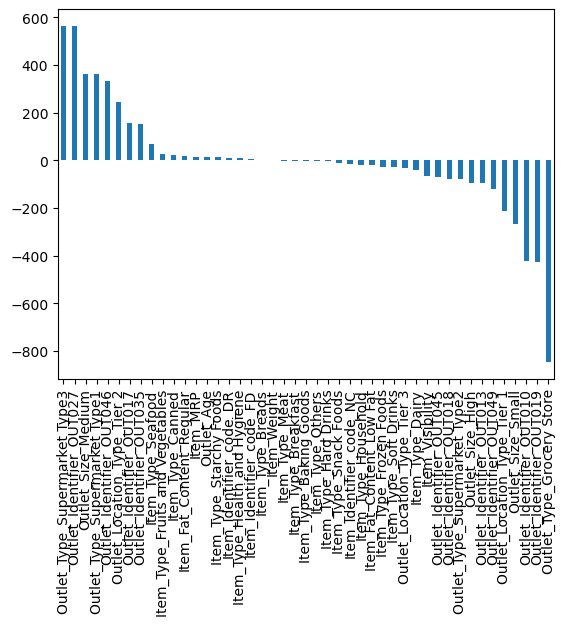

In [294]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [295]:
res_coef = pd.Series(model.coef_, X.columns).sort_values(ascending = False)

In [296]:
top_10_feature = list(res_coef.head(10).index)

In [297]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False)

Outlet_Type_Supermarket Type3      563.460323
Outlet_Identifier_OUT027           563.460323
Outlet_Size_Medium                 363.496912
Outlet_Type_Supermarket Type1      362.755717
Outlet_Identifier_OUT046           334.766376
Outlet_Location_Type_Tier 2        243.419448
Outlet_Identifier_OUT017           158.571052
Outlet_Identifier_OUT035           152.759838
Item_Type_Seafood                   69.383100
Item_Type_Fruits and Vegetables     24.971420
Item_Type_Canned                    20.976322
Item_Fat_Content_Regular            20.032578
Item_MRP                            15.566830
Outlet_Age                          15.529835
Item_Type_Starchy Foods             12.382888
Item_Identifier_code_DR              8.741399
Item_Type_Health and Hygiene         8.086418
Item_Identifier_code_FD              5.624653
Item_Type_Breads                     2.294815
Item_Weight                         -0.319757
Item_Type_Meat                      -2.005471
Item_Type_Breakfast               

In [299]:
model.intercept_

-573.8899178759725

# Lasso L1
# Least Absolute Shrinkage and Selection Operator (LASSO) L1

In [300]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'])


In [301]:
y = train_preprocessed['Item_Outlet_Sales']

In [302]:
model = Lasso(alpha = 100)

In [303]:
model.fit(X,y)

Lasso(alpha=100)

In [304]:
train_predict = model.predict(X)

In [305]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [306]:
test_predict = model.predict(test_X)

In [307]:
test_predict

array([1784.08607817, 1313.87454771, 2581.31313841, ..., 1896.16735275,
       3289.38441632, 1291.76083625])

In [308]:
sample['Item_Outlet_Sales'] = test_predict

In [309]:
sample['Item_Outlet_Sales']

0       1784.086078
1       1313.874548
2       2581.313138
3       2364.683414
4       4247.855690
           ...     
5676    2341.079804
5677    2545.801826
5678    1896.167353
5679    3289.384416
5680    1291.760836
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [310]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Frequency'>

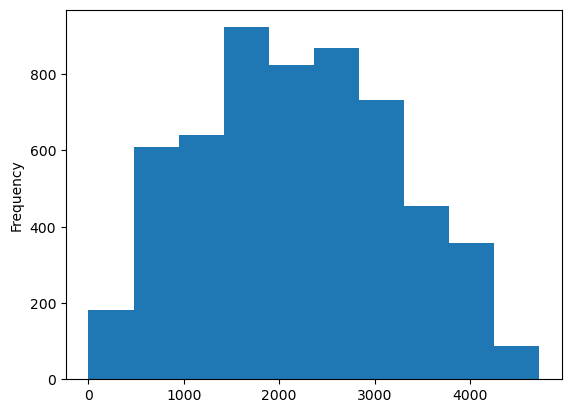

In [311]:
sample['Item_Outlet_Sales'].plot(kind = 'hist')

In [312]:
sample.to_csv('Lasso_All_Columns.csv', index = False)

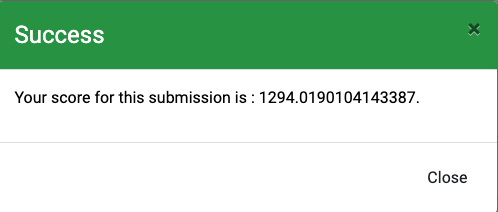

In [313]:
train_predict

array([3986.86136308,  670.01872253, 2307.91850832, ..., 1336.56034594,
       1521.41440706, 1319.22497062])

In [314]:
np.sqrt(mean_squared_error(y,train_predict ))

1209.0945147601817

In [315]:
model.coef_

array([   -0.        ,    -0.        ,    15.51829405,    18.92856586,
          -0.        ,     0.        ,     0.        ,     0.        ,
          -0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
          -0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ,    -0.        ,    -0.        ,   237.75701157,
           0.        ,    -0.        ,    -0.        ,     0.        ,
          -0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ,     0.        , -1299.47072467,     0.        ,
          -0.        ,     0.        ,    -0.        ,     0.        ,
          -0.        ])

<AxesSubplot:>

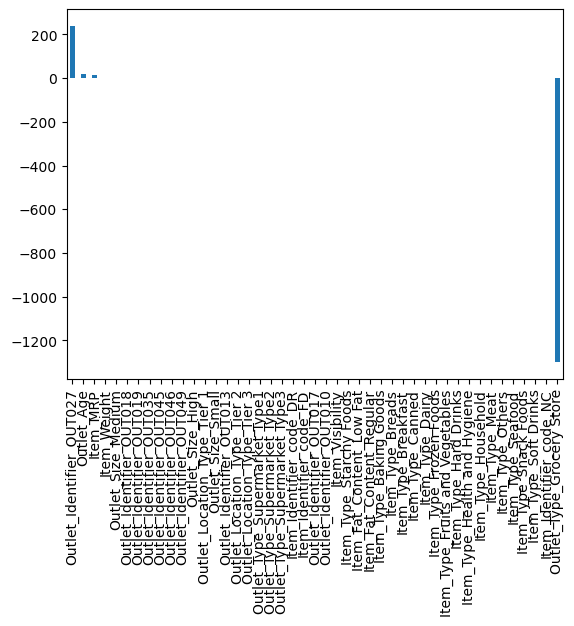

In [316]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [317]:
res_coef = pd.Series(model.coef_, X.columns).sort_values(ascending = False)

In [318]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False)

Outlet_Identifier_OUT027            237.757012
Outlet_Age                           18.928566
Item_MRP                             15.518294
Item_Weight                          -0.000000
Outlet_Size_Medium                    0.000000
Outlet_Identifier_OUT018             -0.000000
Outlet_Identifier_OUT019             -0.000000
Outlet_Identifier_OUT035              0.000000
Outlet_Identifier_OUT045             -0.000000
Outlet_Identifier_OUT046             -0.000000
Outlet_Identifier_OUT049              0.000000
Outlet_Size_High                     -0.000000
Outlet_Location_Type_Tier 1          -0.000000
Outlet_Size_Small                    -0.000000
Outlet_Identifier_OUT013             -0.000000
Outlet_Location_Type_Tier 2           0.000000
Outlet_Location_Type_Tier 3           0.000000
Outlet_Type_Supermarket Type1         0.000000
Outlet_Type_Supermarket Type2        -0.000000
Outlet_Type_Supermarket Type3         0.000000
Item_Identifier_code_DR              -0.000000
Item_Identifi

In [319]:
model.intercept_

-344.03683842522014

# ElasticNet

In [320]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'])


In [321]:
y = train_preprocessed['Item_Outlet_Sales']

In [322]:
model = ElasticNet(alpha = 10)

In [323]:
model.fit(X,y)

ElasticNet(alpha=10)

In [324]:
train_predict = model.predict(X)

In [325]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [326]:
test_predict = model.predict(test_X)

In [327]:
test_predict

array([1677.11990796, 1265.51969704, 3644.99871875, ..., 1791.83839887,
       3238.15337035, 1191.48878914])

In [328]:
sample['Item_Outlet_Sales'] = test_predict

In [329]:
sample['Item_Outlet_Sales']

0       1677.119908
1       1265.519697
2       3644.998719
3       2315.997988
4       3840.183634
           ...     
5676    2168.200015
5677    2540.973496
5678    1791.838399
5679    3238.153370
5680    1191.488789
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [330]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Frequency'>

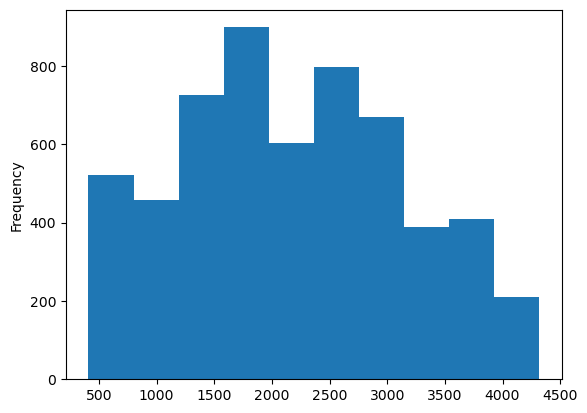

In [331]:
sample['Item_Outlet_Sales'].plot(kind = 'hist')

In [332]:
sample.to_csv('ElasticNet_All_Columns.csv', index = False)

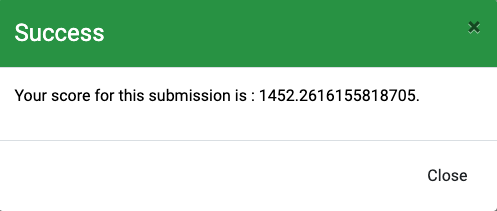

In [333]:
train_predict

array([3892.24985411,  662.87123538, 2204.31854587, ..., 1254.43114894,
       1515.44884925, 1137.53433886])

In [334]:
np.sqrt(mean_squared_error(y,train_predict ))

1375.2000552056845

In [335]:
model.coef_

array([-8.10628272e-01, -1.11589381e+00,  1.55402733e+01,  9.71824790e+00,
       -1.34025657e+00,  1.34025819e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -3.74539572e-02, -0.00000000e+00,
        4.13336753e-01,  0.00000000e+00, -0.00000000e+00, -7.72629460e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.16632491e+01, -0.00000000e+00,
        4.89477234e+00, -1.44601081e+00, -2.16928233e+01,  2.80299367e+01,
        5.16549758e+00,  2.03808417e-01,  1.23121776e+00,  2.49880804e+00,
       -0.00000000e+00,  2.90827253e+01, -2.88607794e+01, -1.59628071e+01,
        1.22640723e+01,  2.69872688e+00, -4.43560747e+01,  1.77721477e+01,
       -1.44600702e+00,  2.80299347e+01, -0.00000000e+00,  1.16230923e+00,
       -6.99622516e-01])

<AxesSubplot:>

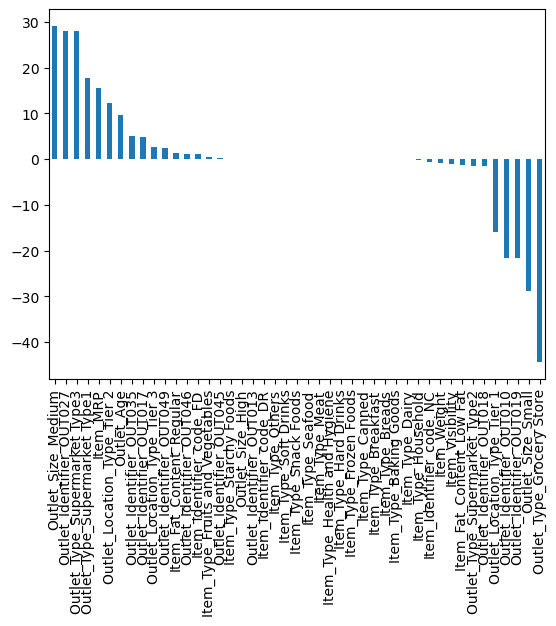

In [336]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False).plot(kind = 'bar')

In [337]:
res_coef = pd.Series(model.coef_, X.columns).sort_values(ascending = False)

In [338]:
pd.Series(model.coef_, X.columns).sort_values(ascending = False)

Outlet_Size_Medium                 29.082725
Outlet_Identifier_OUT027           28.029937
Outlet_Type_Supermarket Type3      28.029935
Outlet_Type_Supermarket Type1      17.772148
Item_MRP                           15.540273
Outlet_Location_Type_Tier 2        12.264072
Outlet_Age                          9.718248
Outlet_Identifier_OUT035            5.165498
Outlet_Identifier_OUT017            4.894772
Outlet_Location_Type_Tier 3         2.698727
Outlet_Identifier_OUT049            2.498808
Item_Fat_Content_Regular            1.340258
Outlet_Identifier_OUT046            1.231218
Item_Identifier_code_FD             1.162309
Item_Type_Fruits and Vegetables     0.413337
Outlet_Identifier_OUT045            0.203808
Item_Type_Starchy Foods             0.000000
Outlet_Size_High                   -0.000000
Outlet_Identifier_OUT013           -0.000000
Item_Identifier_code_DR            -0.000000
Item_Type_Others                   -0.000000
Item_Type_Soft Drinks              -0.000000
Item_Type_

In [339]:
model.intercept_

-248.710055132648

# Modelling with top 10 feature (Found by running lasso with alpha 1)

In [259]:
model = LinearRegression()

In [262]:
model.fit(X[top_10_feature],y)

LinearRegression()

In [263]:
train_predict = model.predict(X[top_10_feature])

In [264]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier'])


In [265]:
test_predict = model.predict(test_X[top_10_feature])

In [266]:
test_predict

array([2299.90848421, 1438.00067343, 2288.10685374, ..., 1902.49976791,
       3473.73260377, 1372.6878702 ])

In [267]:
sample['Item_Outlet_Sales'] = test_predict

In [268]:
sample['Item_Outlet_Sales']

0       2299.908484
1       1438.000673
2       2288.106854
3       2493.218319
4       5160.466721
           ...     
5676    2047.260963
5677    1955.770644
5678    1902.499768
5679    3473.732604
5680    1372.687870
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [269]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Frequency'>

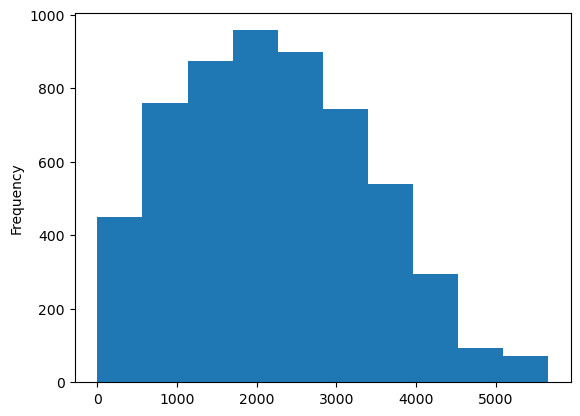

In [270]:
sample['Item_Outlet_Sales'].plot(kind = 'hist')

In [271]:
sample.to_csv('LR_top10_Columns.csv', index = False)

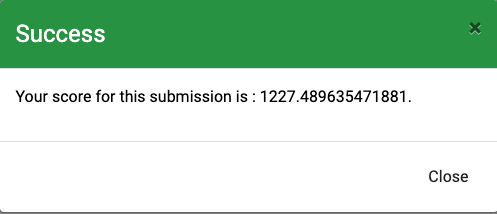

In [272]:
train_predict

array([4511.92574498,   46.9206262 , 2825.93870853, ..., 1504.7280142 ,
        927.08529919,  995.92196207])

In [273]:
np.sqrt(mean_squared_error(y,train_predict ))

1162.2589513087546

In [274]:
model.coef_

array([2190.44719637, 1299.12927373,  232.17488789,  773.96220738,
        168.6590789 ,  126.16717797,   44.35082452,   51.93360188,
         15.58340268,   25.19686814])

<AxesSubplot:>

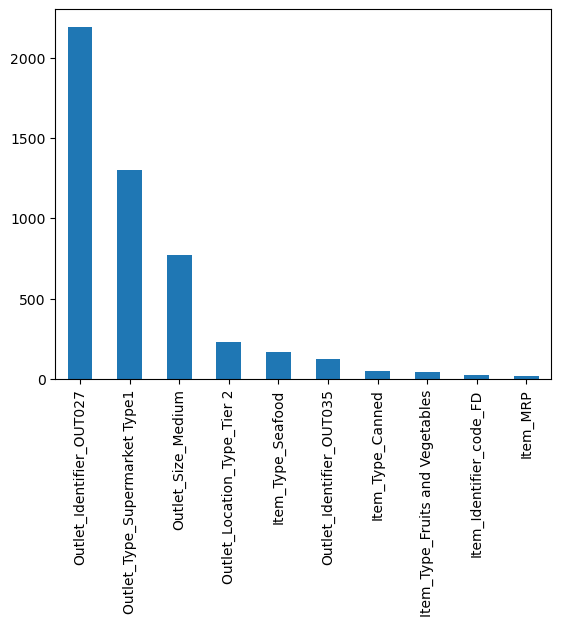

In [276]:
pd.Series(model.coef_, top_10_feature).sort_values(ascending = False).plot(kind = 'bar')

# Find the optimal alpha value for Laasso

In [320]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'])


In [321]:
y = train_preprocessed['Item_Outlet_Sales']

In [341]:
model = Lasso(alpha = 1)

In [346]:
_scoring = ['r2']
results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)

In [351]:
test_cross = results['test_r2'].mean()
train_cross = results['train_r2'].mean()

In [352]:
train_cross, test_cross

(0.5639770473908206, 0.5600315214436246)

In [373]:
alpha_ = [0,0.001,0.01,0.1,0.2, 0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10,20,30]

In [ ]:
train_cross_ = []
test_cross_ = []
for i in tqdm(alpha_):
    model = Lasso(alpha = i)
    results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=5,
                               scoring=_scoring,
                               return_train_score=True)
    test_cross = results['test_r2'].mean()
    train_cross = results['train_r2'].mean()
    train_cross_.append(train_cross)
    test_cross_.append(test_cross)
    
    

  5%|███████████▋                                                                                                                                                                                                                              | 1/20 [00:07<02:20,  7.37s/it]

In [376]:
train_cross_

[0.5642052917353123,
 0.5642052910920574,
 0.5642052360760349,
 0.5641999504872552,
 0.5641848778459198,
 0.5641645968631523,
 0.5641421300600665,
 0.5641179552677841,
 0.5639770473908206,
 0.5637355192342209,
 0.5635345517894926,
 0.5633125662435715,
 0.5630574653803123,
 0.5627689002079064,
 0.5624482348590416,
 0.562099614328649,
 0.5617275326148939,
 0.5613407035917442,
 0.5574316052544648,
 0.5535371643188327]

In [377]:
test_cross_

[0.5587657444649181,
 0.5587672905916345,
 0.5587808658880495,
 0.5589160419809914,
 0.5590686766015099,
 0.5592096434653167,
 0.559335235506693,
 0.5594683023639894,
 0.5600315214436246,
 0.5605415581160003,
 0.5607019049895295,
 0.5607328974916699,
 0.5606790552479342,
 0.5605351842275723,
 0.5603334138266493,
 0.5600874366154694,
 0.5598004092244098,
 0.5594807384032818,
 0.5560659262474523,
 0.5523148361754332]

In [378]:
import seaborn as sns

<AxesSubplot:>

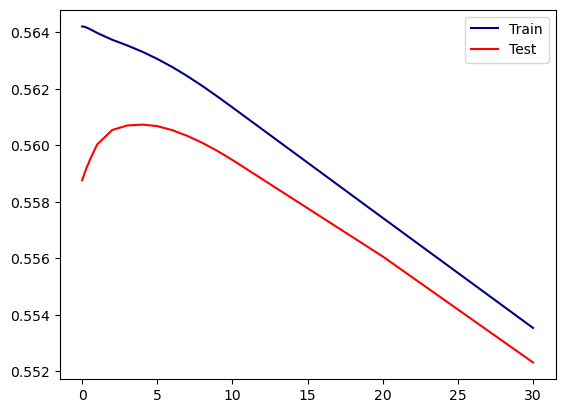

In [379]:
sns.lineplot(x = alpha_, y = train_cross_,color='navy', label='Train' )
sns.lineplot(x = alpha_, y = test_cross_, color='red', label='Test')


#Based on the graph analysis
#The best alpha for lasso is 5

# Polynomial Regression

In [83]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [84]:
train_X_poly = poly.fit_transform(X)
test_X_poly = poly.transform(test_X)

In [85]:
model = LinearRegression()
model.fit(train_X_poly, y)

LinearRegression()

In [86]:
train_predict_poly = model.predict(train_X_poly)
test_predict_poly = model.predict(test_X_poly)

In [87]:
sample['Item_Outlet_Sales'] = test_predict_poly

In [88]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1726.231445
1,FDW14,OUT017,1584.316939
2,NCN55,OUT010,548.582363
3,FDQ58,OUT017,2604.466066
4,FDY38,OUT027,6126.455150
...,...,...,...
5676,FDB58,OUT046,2376.790738
5677,FDD47,OUT018,2565.885051
5678,NCO17,OUT045,1804.309507
5679,FDJ26,OUT017,3911.584248


In [89]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

In [90]:
sample.to_csv('poly_LR.csv', index = False)

In [91]:
np.sqrt(mean_squared_error(y, train_predict_poly))

1054.094358188624

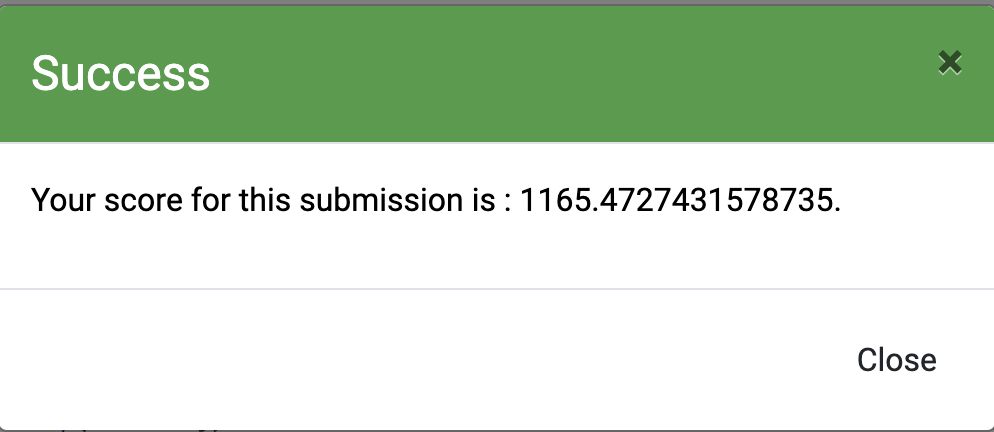

In [92]:
(1773- 1165)/1773

0.34292160180485054

# So far, Improved 34% from Benchmark Score

### Reduced the RMSE error from 1773 to 1165 

# Overfitting

In [93]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [94]:
train_X_poly = poly.fit_transform(X)
test_X_poly = poly.transform(test_X)

In [95]:
train_X_poly.shape

(8523, 17295)

In [96]:
model = LinearRegression()
model.fit(train_X_poly, y)

KeyboardInterrupt: 

In [ ]:
train_predict_poly = model.predict(train_X_poly)
test_predict_poly = model.predict(test_X_poly)

In [ ]:
sample['Item_Outlet_Sales'] = test_predict_poly

In [ ]:
sample

In [ ]:
sample['Item_Outlet_Sales'] = abs(sample['Item_Outlet_Sales'])

In [ ]:
sample.to_csv('poly_degree_3_LR.csv', index = False)

In [ ]:
np.sqrt(mean_squared_error(y, train_predict_poly))

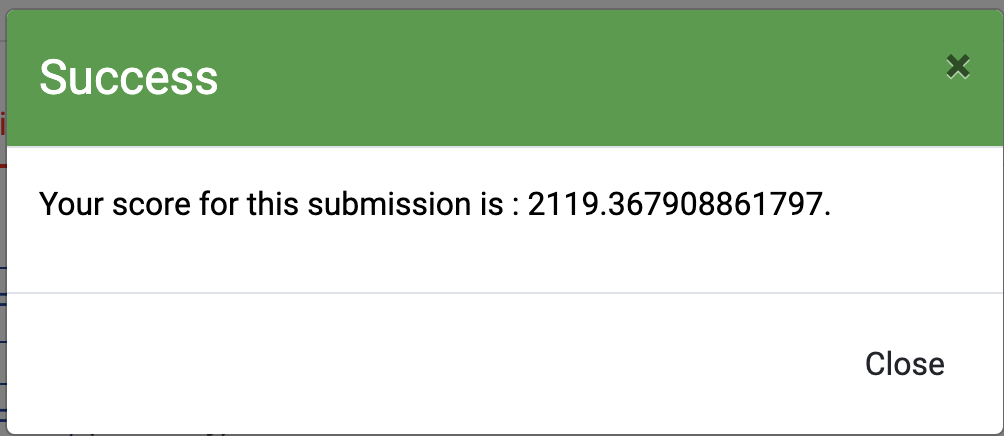

### Train Error - 1012.0230673730377
### Test Error - 2119.36